In [2]:
data = readRDS("../motor/KFZ201705031700.rds")
dict = iop::data2dict(file="../motor/dict.csv")


[1] 1

In [ ]:
devtools::document()
devtools::install()

In [3]:
id_y = iop::dict2y(dict, data)
time = data[["IDVAR_CLMOPENINGDATE"]]
ymd = as.POSIXct(as.Date(as.POSIXct(time)))
ymx = (format(ymd, format="%Y-%m"))
data[[id_y]] = (as.character(data[[id_y]]))

table(ymx, data[[id_y]])
ym = unique(ymx)

         
ymx           0     1
  2016-01 15375    26
  2016-02 15715    22
  2016-03 17292    25
  2016-04 17912    28
  2016-05 18727    44
  2016-06 19843    34
  2016-07   695     2

In [ ]:
library(dplyr)
library(ggplot2)
i = 1
.ym = ym[i]
y = data[[id_y]]
i0 = which(ymx == ym[i] & y == 0)
i1 = which(ymx <= ym[i] & y == 1)
id = c(i0, i1)
id_xnum = iop::dict2xnum(dict, CALIB)
df = data[id,id_xnum] %>% 
tidyr::gather(k,v) %>%
group_by(k) %>%
mutate(v=(v-min(v))/diff(range(v))) %>%
filter(length(unique(v)) > 2) %>%
ungroup 

head(df)

In [ ]:
kk = unique(df$k)
length(kk)
df %>% filter(k==kk[7]) %>% 
mutate(v1 = log(v)) %>%
tidyr::gather(kk, vv, -k) %>%
ggplot(aes(vv)) + geom_histogram(size=1, alpha=.1) + facet_wrap(~kk, scales="free_y") 

In [4]:
i = 5
.ym = ym[i]
y = data[[id_y]]
i0 = which(ymx == ym[i] & y == 0)
i1 = which(ymx <= ym[i] & y == 1)
id_calib = c(i0, i1)
CALIB = data[id_calib,]
dim(CALIB)

length(i0)
length(i1)

## calibrating
.na2rm = iop::na2rm(CALIB)
CALIB = predict(.na2rm, CALIB)
.const2rm = iop::const2rm(CALIB)
CALIB = predict(.const2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.nzv2rm = iop::nzv2rm(CALIB[,id_xnum])
CALIB = predict(.nzv2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.cor2rm = iop::cor2rm(CALIB[,id_xnum])
CALIB = predict(.cor2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.num2scale = iop::num2scale(CALIB[,id_xnum])
#CALIB = predict(.num2scale, CALIB)

dim(CALIB)

[1] 18872   313

[1] 18727

[1] 145

[1] 18872   259

In [9]:
table(LEARN[[id_y]])


    0     1 
18727   145 

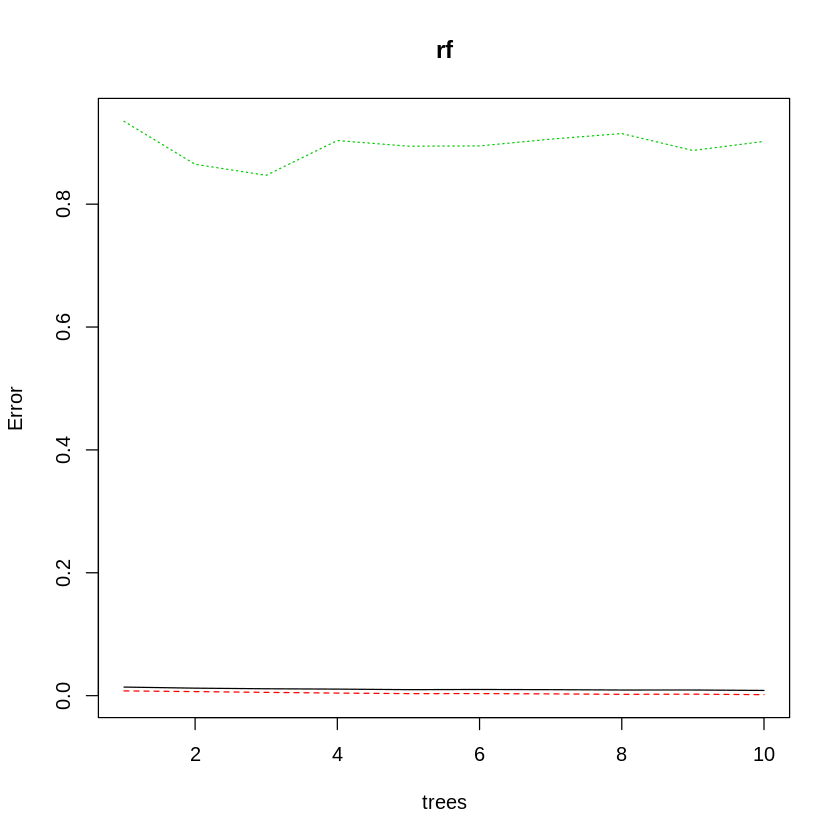

In [6]:

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    id_learn = c(i0, i1)
    LEARN = data[id_learn,]
LEARN[[id_y]] = as.factor(LEARN[[id_y]])
    f = iop::data2formula(dict, CALIB, varx="xnum")
    .num2selrf = num2selrf(LEARN, f)

[1] 123

$sel
 [1] "IDVAR_POLINSTALLMENTPREMIUM"         "IDVAR_INVSTATEDVALUE"               
 [3] "IDVAR_POLEFFECTIVEFROMDATEMON"       "IDVAR_CLMCLOSINGBEFORERENEWALDAYS"  
 [5] "IDVAR_CLMCLOSINGAFTERRENEWALDAYS"    "IDVAR_INPDOBTOEVTDATE"              
 [7] "IDVAR_INVENGINSPECTIONDAYS"          "IDVAR_CLMREPORTINGTIMEAFTERINCIDENT"
 [9] "IDVAR_CLMOPENINGAFTERSTARTDAYS"      "IDVAR_EVTDAYSFROMPAYMENTDUE"        
[11] "IDVAR_INSERTTOACPADDRESSPROFILE"     "IDVAR_CLMEXPENSET"                  
[13] "IDVAR_CLMEVENTAFTERSTARTDAYS"       

attr(,"class")
[1] "num2selrf"

[1] "IDVAR_FRAUD"

[1] 20022

[1] 20022

   a
p       0     1
  0 19837   143
  1     6    36

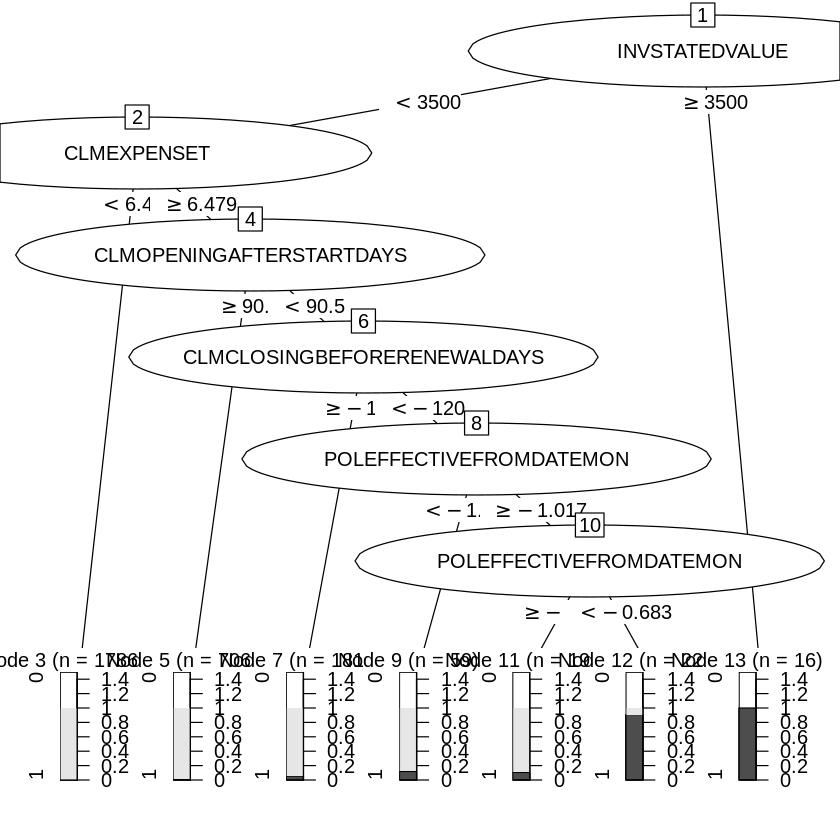

In [43]:
length(id_xnum)
.num2selrf
id_y
df = LEARN[, c(id_y, .num2selrf$sel)] 
#df = LEARN[,c(id_y, id_x)]

colnames(df) = gsub("IDVAR_", "", colnames(df))
dt = rpart::rpart(FRAUD ~ ., data=df)

plot(partykit::as.party(dt),tp_args = list(text = "vertical", ymax = 1.5))

    i0 = which(ymx == ym[i+1] & y == 0)
    i1 = which(ymx <= ym[i+1] & y == 1)
    id_eval = c(i0, i1)
df = data[id_eval, ]
colnames(df) = gsub("IDVAR_", "", colnames(df))
p=predict(dt, df, type="class")
length(p)
nrow(df)
table(p, a=df$FRAUD)

In [28]:
num2selrf <- function(x, f, thresh=5, ntree=10){
    rf = randomForest::randomForest(f, data=x, ntree=10)
    plot(rf)
    labs = rownames(rf$importance)
    sel = labs[rf$importance >= thresh]
    model = list(sel=sel)
    class(model) = c("num2selrf")
    return(model)
}

predict.num2selrf <- function(model){
    model$sel
}

In [32]:
dev.off(4)

png 
  2

In [ ]:
x = predict(.num2norm, CALIB, "minmax")
smooth = .001
id_xnum = iop::dict2xnum(dict, CALIB)
x[,id_xnum] = lapply(id_xnum, function(i) log(x[[i]]+smooth))



In [ ]:
f = iop::data2formula(dict, CALIB, varx="xnum")
    rf = randomForest::randomForest(f, data=x, ntree=10)
    labs = rownames(rf$importance)
    log.sel = labs[rf$importance >= 5]

In [ ]:
aa = num2selrf(CALIB, f)

In [ ]:
.num2selrf = aa

In [ ]:
##
## NBTree
##
## - Decision tree-based paritioning of the data (unbalanced)
## - No interaction data (needed)
## - Data subsets at each leaf node is a Naive Bayes Classifer
## - Prediction:
##     if DT == 0 -> 0
##     if NB == 1 -> 1
##     else       -> 0
##

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    id_learn = c(i0, i1)
    LEARN = data[id_learn,]
    id_y = iop::dict2y(dict, CALIB)
    f = paste0(id_y, " ~ ", paste0(.num2selrf$sel, collapse=" + "))
    loss = matrix(c(0, 1, 5, 0), ncol=2, byrow=T)
    library(partykit)
    dt = rpart::rpart(f, data=LEARN, parms=list(loss=loss, split="information"))

    nb = fastNaiveBayes::fastNaiveBayes(x=LEARN[,id_xnum], y=LEARN[[id_y]])## comparison

    fit = fitted(as.party(dt))
    id_node = fit[,1]
    nodes = unique(id_node)
    id_xnum = iop::dict2xnum(dict, CALIB)
    NBTree = list()
    tt = table(LEARN[[id_y]])
    priors = as.numeric(tt/sum(tt))
    tmp = lapply(nodes, function(node){
        sel = id_node == node
        x = data[sel,id_xnum]
        if(nrow(x) < 10){
            return(NULL)
        }else{
            x[is.na(x)] = 0
            y = data[[id_y]][sel]
            NBTree[[node]] <<- fastNaiveBayes::fastNaiveBayes(x=x, y=y, priors=priors)
        }
    })


In [ ]:
y = data[[id_y]]
i0 = which(ymx == ym[i+1] & y == 0)
i1 = which(ymx <= ym[i+1] & y == 1)
n0 = length(i1)
id_eval = c(sample(i0, n0), i1)
#id_eval = c(i0,i1)
EVAL = data[id_eval,]
dim(EVAL)

library(fastNaiveBayes)
p_node = predict(as.party(dt), newdata=EVAL[,id_xnum], type="node")
p_nb = rep(NA,length(p_node))
p_nb = list()
p_nb[nodes] = lapply(nodes, function(node){
    nb
    p = predict(NBTree[[node]], newdata=EVAL[,id_xnum], type="class")
    p
})

p_dt = as.character(predict(dt, newdata=EVAL[,id_xnum], type="class"))

p_nb. = as.character(predict(nb, newdata=EVAL[,id_xnum], type="class"))

p_nbtree = as.character(sapply(1:length(p_node), function(i){
    p_nb[[p_node[i]]][i]
}))
a = as.character(EVAL[[id_y]])
table(p_dt, a)

table(p_nb., a)

table(p_dt, p_nbtree, a)
p = ifelse(p_dt == 0, p_dt, ifelse(p_nbtree == 1, p_nbtree, 0))
table(p,a)

    conf = as.matrix(table(p,a))
    TP = conf[2,2]
    FP = conf[2,1]
    FN = conf[1,2]
    PPV = TP / (TP+FP)
    REC = TP / (TP+FN)
    F1 = PPV*REC*2/(REC+PPV)
PPV
REC
F1


In [ ]:
names(.num2norm$lut)

In [ ]:
num2interaction <- function(x, ...){
    labs = colnames(x)
    comb = combn(labs,m=2)
    combs = 1:ncol(comb)
    newx = list()
    newx[combs] = lapply(combs, function(i){
        a = comb[1,i]
        b = comb[2,i]
        x[[a]] * x[[b]]
    })

    name = sapply(combs, function(i){
        a = comb[1,i]
        b = comb[2,i]
        paste0(a,"_x_",b)
    })
    return(as.data.frame(newx, col.names=name))
}

In [ ]:
## SVM
##
## - Linear model with interaction (terms)
## 

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    n0 = length(i1)
    ##id_learn = c(sample(i0, n0), i1)
    id_learn = c(i0, i1)
    id_xnum = iop::dict2xnum(dict, CALIB, varx="xnum")
##id_xnum = .num2selrf$sel
    LEARN = data[id_learn,]
LEARN = predict(.num2scale, LEARN, "sc")
dim(LEARN)
    sel = complete.cases(LEARN[,id_xnum])
    LEARN = LEARN[sel,]
dat = LEARN[, id_xnum]
    svm = LiblineaR::LiblineaR(data=dat,target=LEARN[[id_y]])

    y = data[[id_y]]
    i0 = which(ymx >= ym[i+1] & y == 0)
    i1 = which(ymx <= ym[i+1] & y == 1)
    n0 = length(i1)
n0
    #id_eval = c(sample(i0, n0), i1)
    id_eval = c(i0,i1)
    EVAL = data[id_eval,]
    sel = complete.cases(EVAL[,id_xnum])
    EVAL = EVAL[sel,]
EVAL = predict(.num2scale, EVAL, "sc")
dat = EVAL[, id_xnum]
    dim(EVAL)
    #p = predict(svm, newx=EVAL[,id_xnum])
    p = predict(svm, newx=dat)$predictions
    a = EVAL[[id_y]]
    table(p,a)

    conf = as.matrix(table(p,a))
    TP = conf[2,2]
    FP = conf[2,1]
    FN = conf[1,2]
    PPV = TP / (TP+FP)
    REC = TP / (TP+FN)
    F1 = PPV*REC*2/(REC+PPV)
PPV
REC
F1


In [ ]:
dt = iris[1:100, c(1:2,5)]
dt$Species = ifelse(dt$Species == "setosa", 1, -1)
dt[,1:2] = scale(dt[,1:2])
esvm = e1071::svm(Species ~. , dt, kernel="linear")
lsvm = LiblineaR::LiblineaR(dt[,1:2], dt[[3]])

sl = (t(esvm$coefs) %*% esvm$SV)

library(ggplot2)

X1 = seq(min(dt[,1]), max(dt[,1]), length.out = 10) 
X2 = seq(min(dt[,2]), max(dt[,2]), length.out = 10) 
  

w <- t(esvm$coefs) %*% esvm$SV
b <- -esvm$rho
i = -b/w[1,2]
s = -w[1,1]/w[1,2]
# in this 2D case the hyperplane is the line w[1,1]*x1 + w[1,2]*x2 + b = 0
# abline(a=-b/w[1,2], b=-w[1,1]/w[1,2], col="blue", lty=3)

ww = lsvm$W[1,1:2]
bb = lsvm$W[1,3]

ii = -bb/ww[2]
ss = -ww[1]/ww[2]

grid = expand.grid(X1, X2) 
colnames(grid) = colnames(dt)[1:2] 
y_grid = predict(esvm, newdata = grid) 






h = sqrt(sum(lsvm$W[,1:(ncol(lsvm$W)-1)]^2))
predict(esvm, newx=dt, type="score")
d = apply(dt[,1:2],1,function(x)sqrt(sum(x-h)^2))
          
dt$d = 1

ggplot() + geom_tile(data=data.frame(grid, p=y_grid),aes(Sepal.Length, Sepal.Width, fill=p), alpha=.1) + 
geom_point(data=dt, aes(Sepal.Length, Sepal.Width, color=Species, size=d), alpha=.5) +
geom_point(data=as.data.frame(esvm$SV), aes(Sepal.Length, Sepal.Width)) + 
geom_abline(intercept = i, slope = s, color="blue") + 
geom_abline(intercept = ii, slope=ss, color="red")



In [ ]:
lsvm$W

In [ ]:
## with all xnum

18872 313 

    20022 313 

   a
p       0     1
  0 19841   162
  1     2    17

0.894736842105263
0.0949720670391061
0.171717171717172

## only with selrf
     18872 313 

179

    20717 313 

   a
p       0     1
  0 20538   163
  1     0    16

1
0.0893854748603352
0.164102564102564

In [ ]:
.num2selrf$sel

In [ ]:
dat[1:10,]

In [ ]:
library(ggplot2)

In [ ]:
dat = iris[1:100, c(1:2,5)]

dat[,1:2] = lapply(1:2, function(x){ (dat[[x]]-min(dat[[x]]))/diff(range(dat[[x]])) })

svmfit = LiblineaR::LiblineaR(dat[,1:2],dat[,3])
grid <- expand.grid(seq(min(dat[, 1]), max(dat[, 1]),length.out=10),                                                                                                         
                            seq(min(dat[, 2]), max(dat[, 2]),length.out=10)) 
names(grid) <- names(dat)[1:2]
preds <- predict(svmfit, newx=grid)$predictions
df.0 <- data.frame(grid, preds, l="0")

##ggplot(df.0, aes(Sepal.Length, Sepal.Width, fill=as.integer(preds))) + geom_tile()  +
##geom_point(data=dat, aes(Sepal.Length, Sepal.Width))



d1 = dat[10:15,]
d0 = dat[51:100,]
dat2 = rbind(d1, d0)
svmfit = LiblineaR::LiblineaR(dat2[,1:2],dat2[,3])
grid <- expand.grid(seq(min(dat2[, 1]), max(dat2[, 1]),length.out=10),                                                                                                         
                            seq(min(dat2[, 2]), max(dat2[, 2]),length.out=10)) 
names(grid) <- names(dat2)[1:2]
preds <- predict(svmfit, newx=grid)$predictions
df.op <- data.frame(grid, preds, l="1")

ggplot(df.op, aes(Sepal.Length, Sepal.Width)) + geom_tile(aes(fill=as.integer(preds)))  + 
geom_point(data=d1,aes(Sepal.Length, Sepal.Width), color="red") + 
geom_point(data=d0,aes(Sepal.Length, Sepal.Width), color="white") 



In [ ]:
library(ggplot2)

In [ ]:
dd = (data[i1,id_xnum])

In [ ]:
d = dist(scale(dd))
fit <- cmdscale(d,eig=TRUE, k=2) # k is the number of dim
#fit # view results

# plot solution
x <- fit$points[,1]
y <- fit$points[,2]
df=data.frame(x,y)
ggplot(df, aes(x,y))+geom_point()

In [ ]:
tsne = Rtsne::Rtsne(CALIB[,id_xnum], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
df = data.frame(x=tsne$Y[,1], y=tsne$Y[,2]) 
kk = kmeans((df), 10)
df%>% mutate(p=predict(kk, df), p=as.character(p)) %>%
arrange(p) %>%
{ggplot(., aes(x,y,color=p)) + geom_point(alpha=.1, size=5) +geom_text(aes(label=p), size=5, color="black")
}



dd$p = predict(kk, df)
dd %>% filter(p==1)

In [ ]:
predict.kmeans <- function(object, newdata){
    centers <- object$centers
    n_centers <- nrow(centers)
    dist_mat <- as.matrix(dist(rbind(centers, newdata)))
    dist_mat <- dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

In [ ]:
df%>% mutate(p=predict(kk, df), p=as.character(p)) %>%
arrange(p) %>%
{ggplot(., aes(x,y,color=p)) + geom_point(alpha=.1, size=1) 
}



dd$p = predict(kk, df)
dd %>% filter(p==1)

In [ ]:
## SVMclust
##
## - Linear model with interaction (terms)
## 

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    n0 = length(i1)
    ##id_learn = c(sample(i0, n0), i1)

x = data[c(i1,i0), id_xnum]
y = data[c(i1,i0), id_y]

i0 = which(y == 0)
i1 = which(y == 1)

dat = x[i1,]
tsne = Rtsne::Rtsne(x, dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
df = data.frame(x=tsne$Y[,1], y=tsne$Y[,2]) 
kk = kmeans((df), 5)

predict.kmeans <- function(object, newdata){
    centers <- object$centers
    n_centers <- nrow(centers)
    dist_mat <- as.matrix(dist(rbind(centers, newdata)))
    dist_mat <- dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

p1 = predict(kk, df)


centers = unique(p1)
SVMclust = list()
SVMclust[centers] = lapply(centers, function(center){
    id_learn = c(i0, i1[p1 == center])
    svm = LiblineaR::LiblineaR(data=x[id_learn,],target=y[id_learn],
                               wi = c("0"=1,"1"=100),cost=100)
})

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    n0 = length(i1)
EVAL = data[c(i0,i1),]
ll = list()
ll[centers] = lapply(centers, function(i){
    p = predict(SVMclust[[i]], newx=EVAL[,id_xnum])$predictions
    as.numeric(as.character(p))
})
p = ifelse(apply(as.data.frame(ll),1,sum)/length(centers) > .5,1,0)
table(p,a=EVAL[[id_y]])

In [ ]:
w = c(5,1,1,1,5)
w = w/sum(w)
dt = as.data.frame(ll)
table(apply(ifelse(as.matrix(dt), 1, function(i)sum(i*w) ) > .5,1,0), EVAL[[id_y]])

In [ ]:
library(ggplot2)
library(dplyr)
df%>% mutate(p=predict(kk, df), p=as.character(p)) %>%
arrange(p) %>%
{ggplot(., aes(x,y,color=p)) + geom_point(alpha=.1, size=5) +geom_text(aes(label=p), size=5, color="black")
}


In [ ]:
class::knn

In [ ]:
## SVM
##
## - Linear model with interaction (terms)
## 

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    n0 = length(i0)
    n1 = length(i1)
    ##id_learn = c(sample(i0, n0), i1)
    id_learn = c(i0, i1)
    id_xnum = iop::dict2xnum(dict, CALIB)
id_y = iop::dict2y(dict, CALIB)
##id_xnum = .num2selrf$sel
    LEARN = data[id_learn,]
LEARN = predict(.num2scale, LEARN, "sc")
dim(LEARN)
    sel = complete.cases(LEARN[,id_xnum])
    LEARN = LEARN[sel,]

    i0 = which(LEARN[[id_y]] == 0)
    i1 = which(LEARN[[id_y]] == 1)
    ncol = as.integer(sqrt(length(id_xnum)))
    nrow0 = as.integer((length(i0)/2))
    nrow1 = as.integer((length(i1)))
    nrow1 = length(i1)

rp = list()
nplane = 10
planes = 1:nplane
rp[planes] = lapply(planes, function(i){
    cols = sample(id_xnum, ncol)
    rows0 = sample(i0, nrow0)
    rows1 = sample(i1, nrow1)
    dat = LEARN[c(rows0, rows1), ]
    svm = LiblineaR::LiblineaR(data=dat[,cols],target=dat[[id_y]])
    svm
})

    y = data[[id_y]]
    i0 = which(ymx >= ym[i+1] & y == 0)
    i1 = which(ymx <= ym[i+1] & y == 1)
    n0 = length(i1)*2

    #id_eval = c(sample(i0, n0), i1)
    id_eval = c(i0,i1)
    EVAL = data[id_eval,]
    sel = complete.cases(EVAL[,id_xnum])
    EVAL = EVAL[sel,]
EVAL = predict(.num2scale, EVAL, "sc")

dim(EVAL)

#EVAL = head(EVAL, 1000)

dim(EVAL)

ps = list()
ps[planes] = lapply(planes, function(i){
    p = as.numeric(as.character(predict(rp[[i]], newx=EVAL[, id_xnum])$predictions))
    p
})

pp = as.data.frame(ps, col.names = planes)
thresh = .5
p = ifelse(apply(pp, 1, sum)/nplane >= thresh, 1, 0)


In [ ]:
pp = as.data.frame(ps, col.names = planes)
thresh = .5
p = ifelse(apply(pp, 1, sum)/nplane >= thresh, 1, 0)

    a = EVAL[[id_y]]
    table(p,a)

    conf = as.matrix(table(p,a))
    TP = conf[2,2]
    FP = conf[2,1]
    FN = conf[1,2]
    PPV = TP / (TP+FP)
    REC = TP / (TP+FN)
    F1 = PPV*REC*2/(REC+PPV)
PPV
REC
F1